# Parte II - Machine Learning Baseline

### Consigna

Vamos a construir un modelo muy sencillo para saber qué es lo peor que podemos hacer, en general esta es una tarea muy importante que queremos que repitan en sus proyectos de machine learning. ¿Por qué?

* Navaja de Ockam: “Cuando se ofrecen dos o más explicaciones de un fenómeno, es preferible la explicación completa más simple; es decir, no deben multiplicarse las entidades sin necesidad.” ¿Para qué desarrollar un modelo super complejo si capaz es peor o casi igual que uno muy sencillo?
* Nos sirve para saber si estamos usando bien los modelos más complejos, si su score nos da peor al baseline probablemente se deba a un error de código.
* Nos sirve para rápidamente saber que tan complejo es un problema.
* Los modelos simples son fáciles de entender.

Utilice **todas las columnas del dataset** (exceptuando columnas que no tenga sentido usar para predecir) con algún encoding donde sea necesario para entrenar una regresión logística, utilizando búsqueda de hiperparametros y garantizando la reproducibilidad de los resultados cuando el notebook corriera varias veces. Conteste las preguntas:

* ¿Cuál es el mejor score de validación obtenido? (¿Cómo conviene obtener el dataset para validar?)
* Al predecir con este modelo para test, ¿Cúal es el score obtenido? (guardar el csv con predicciones para entregarlo después)
* ¿Qué features son los más importantes para predecir con el mejor modelo? Graficar.

### Imports

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

### Análisis del dataset y división de train y test

In [ ]:
df = pd.read_parquet('/content/drive/MyDrive/Datos/TP3/train')
df

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,content,surprise1,surprise2,popular,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,-0.200000,0.500000,-0.187500,0.000000,0.187500,\nHaving trouble finding something to watch on...,the world,"amusement,disgust",False,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,-0.100000,0.000000,0.000000,0.500000,0.000000,\nThe Associated Press is the latest news orga...,business,,False,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,-0.133333,0.000000,0.000000,0.500000,0.000000,\nIt looks like 2012 was a pretty good year fo...,the world,,False,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,-0.166667,0.000000,0.000000,0.500000,0.000000,"\nWhen it comes to college football, NASA astr...",sports,,False,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,-0.050000,0.454545,0.136364,0.045455,0.136364,\nLAS VEGAS -- Sharing photos and videos on yo...,the world,,False,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35658,http://mashable.com/2014/10/28/cree-led-light-...,72.0,12.0,323.0,0.573668,1.0,0.729282,4.0,1.0,0.0,...,-0.155556,0.288889,-0.155556,0.211111,0.155556,\nLED lighting is more power-efficient and las...,science/tech,,True,42000
35659,http://mashable.com/2014/10/28/dancing-with-th...,72.0,13.0,433.0,0.563084,1.0,0.756654,3.0,2.0,9.0,...,-0.166667,0.833333,0.500000,0.333333,0.500000,"\nWith only eight couples left, ABC had to fin...",the world,,False,2300
35660,http://mashable.com/2014/10/28/dangerous-airpo...,72.0,13.0,1061.0,0.498020,1.0,0.686688,5.0,5.0,1.0,...,-0.050000,0.400000,-0.400000,0.100000,0.400000,\nParo Airport in Bhutan is located in a deep ...,the world,"disgust,optimism",False,567
35661,http://mashable.com/2014/10/28/disney-villains...,72.0,13.0,1777.0,0.449708,1.0,0.631970,36.0,28.0,12.0,...,-0.100000,0.000000,0.000000,0.500000,0.000000,"\nDisney villains are evil, but no one tops th...",the world,"love,optimism",False,783


In [ ]:
df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35663 entries, 0 to 35662
Data columns (total 65 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            35663 non-null  object 
 1   timedelta                      35663 non-null  float64
 2   n_tokens_title                 35662 non-null  float64
 3   n_tokens_content               35661 non-null  float64
 4   n_unique_tokens                35662 non-null  float64
 5   n_non_stop_words               35662 non-null  float64
 6   n_non_stop_unique_tokens       35661 non-null  float64
 7   num_hrefs                      35660 non-null  float64
 8   num_self_hrefs                 35661 non-null  float64
 9   num_imgs                       35660 non-null  float64
 10  num_videos                     35657 non-null  float64
 11  average_token_length           35663 non-null  float64
 12  num_keywords                   35662 non-null 

In [ ]:
df['surprise1'].describe()

count         35663
unique            4
top       the world
freq          24893
Name: surprise1, dtype: object

In [ ]:
df['surprise2'].describe()

count     35663
unique       75
top            
freq      21837
Name: surprise2, dtype: object

Separo el target del resto del dataset:

In [ ]:
x = df.iloc[:,:-2]
y = df.popular

Tomo el 90% de las filas para entrenar y el otro 10% para validar. Para evitar el time-travelling y como los datos estan ordenados segun timedelta, tomo los primeros registros para entrenar y los restantes para validar, en lugar de tomar registros random:

In [ ]:
x_train, y_train = x.head(int(len(x)*0.9)).copy(), y.head(int(len(y)*0.9)).copy()
x_valid, y_valid = x.tail(int(len(x)*0.1)).copy(), y.tail(int(len(y)*0.1)).copy()

In [ ]:
x_train.head(6)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,content,surprise1,surprise2
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,\nHaving trouble finding something to watch on...,the world,"amusement,disgust"
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,\nThe Associated Press is the latest news orga...,business,
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,\nIt looks like 2012 was a pretty good year fo...,the world,
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,"\nWhen it comes to college football, NASA astr...",sports,
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,\nLAS VEGAS -- Sharing photos and videos on yo...,the world,
5,http://mashable.com/2013/01/07/beewi-smart-toys/,731.0,10.0,370.0,0.559889,1.0,0.698198,2.0,2.0,0.0,...,-0.195000,-0.400,-0.100000,0.642857,0.214286,0.142857,0.214286,\nLAS VEGAS -- RC toys have traded in their bu...,science/tech,


### Encoding

Comienzo quitando las columnas timedelta y url del dataset ya que no las voy a usar para predecir:

In [ ]:
x_train = x_train.iloc[:,2:]
x_valid = x_valid.iloc[:,2:]

Para los valores numéricos del dataset reemplazo los nans con la media de la columna:

In [ ]:
means = {}

def fill_numeric_na(data):
  for column in data:
    if data[column].dtype == np.float64:
      if column not in means:
        mean =  data[column].sum()/len(data[column])
        means[column] = mean
      data[column].fillna(means[column], inplace=True)
  
fill_numeric_na(x_train)
fill_numeric_na(x_valid)

Como este modelo es un baseline encodeo el contenido de manera simple reemplazando con la longitud del string:

In [ ]:
def transform_content(data):
  data['content_len'] = data['content'].map(lambda x: len(x) if x else 0)
  data.drop('content', axis=1, inplace=True)

transform_content(x_train)
transform_content(x_valid)

En el caso de surprise1 y surprise2, para no complejzar el modelo baseline aplico One Hot Encoding a ambos:

In [ ]:
surprise1_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
encoded_sur1 = surprise1_encoder.fit_transform(x_train[['surprise1']]).todense().astype(int)
x_train = x_train.reset_index().drop(['index', 'surprise1'], axis=1).join(pd.DataFrame(encoded_sur1, columns=surprise1_encoder.get_feature_names_out()))
encoded_sur1 = surprise1_encoder.transform(x_valid[['surprise1']]).todense().astype(int)
x_valid = x_valid.reset_index().drop(['index', 'surprise1'], axis=1).join(pd.DataFrame(encoded_sur1, columns=surprise1_encoder.get_feature_names_out()))

surprise2_encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
encoded_sur2 = surprise2_encoder.fit_transform(x_train[['surprise2']]).todense().astype(int)
x_train = x_train.reset_index().drop(['index', 'surprise2'], axis=1).join(pd.DataFrame(encoded_sur2, columns=surprise2_encoder.get_feature_names_out()))
encoded_sur2 = surprise2_encoder.transform(x_valid[['surprise2']]).todense().astype(int)
x_valid = x_valid.reset_index().drop(['index', 'surprise2'], axis=1).join(pd.DataFrame(encoded_sur2, columns=surprise2_encoder.get_feature_names_out()))

In [ ]:
x_valid.head(6)

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,"surprise2_love,nervousness","surprise2_love,optimism","surprise2_love,relief","surprise2_love,sadness","surprise2_nervousness,optimism","surprise2_nervousness,sadness","surprise2_neutral,optimism","surprise2_neutral,relief","surprise2_optimism,relief","surprise2_optimism,sadness"
0,10.0,458.0,0.544218,1.0,0.712687,11.0,0.0,0.0,2.0,4.764192,...,0,0,0,0,0,0,0,0,0,0
1,6.0,713.0,0.466761,1.0,0.635036,11.0,0.0,1.0,0.0,5.288920,...,0,0,0,0,0,0,0,0,0,0
2,13.0,1341.0,0.457207,1.0,0.671815,1.0,1.0,3.0,2.0,4.501864,...,0,0,0,0,0,0,0,0,0,0
3,7.0,731.0,0.455307,1.0,0.639225,11.0,3.0,1.0,0.0,4.604651,...,0,0,0,0,0,0,0,0,0,0
4,15.0,610.0,0.494983,1.0,0.647383,16.0,5.0,1.0,0.0,4.804918,...,0,0,0,0,0,0,0,0,0,0
5,11.0,1740.0,0.453875,1.0,0.595427,10.0,8.0,52.0,0.0,4.618966,...,0,0,0,0,0,0,0,0,0,0


### Búsqueda de hiperparámetros y entrenamiento del modelo

In [ ]:
logistic_regression = LogisticRegression(random_state=123)
hiper_params = {
    'C': np.logspace(-4, 4, 600),
    'max_iter': [60, 80, 100, 120, 140, 160, 180, 200],
    'penalty': ['l2', 'l1', 'none'],
    'solver': ['lbfgs', 'newton-cg']}
model = RandomizedSearchCV(logistic_regression, hiper_params, n_iter=10, scoring='roc_auc', random_state=123)
model.fit(x_train.values, y_train.values)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1484: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio parameters"
/usr/local/lib/python

RandomizedSearchCV(estimator=LogisticRegression(random_state=123),
                   param_distributions={'C': array([1.00000000e-04, 1.03123013e-04, 1.06343558e-04, 1.09664681e-04,
       1.13089523e-04, 1.16621323e-04, 1.20263422e-04, 1.24019264e-04,
       1.27892401e-04, 1.31886497e-04, 1.36005329e-04, 1.40252793e-04,
       1.44632906e-04, 1.49149810e-04, 1.53807778e-04, 1.58611214e-04,
       1.63564663e-...
       6.30472445e+03, 6.50162180e+03, 6.70466828e+03, 6.91405593e+03,
       7.12998278e+03, 7.35265305e+03, 7.58227735e+03, 7.81907284e+03,
       8.06326348e+03, 8.31508023e+03, 8.57476125e+03, 8.84255214e+03,
       9.11870618e+03, 9.40348454e+03, 9.69715656e+03, 1.00000000e+04]),
                                        'max_iter': [60, 80, 100, 120, 140, 160,
                                                     180, 200],
                                        'penalty': ['l2', 'l1', 'none'],
                                        'solver': ['lbfgs', 'newton-cg']},
  

### Predicción para validation

In [ ]:
binary_preds = model.predict(x_valid.values)
proba_preds = model.predict_proba(x_valid.values)[:, 1]

In [ ]:
print(classification_report(y_valid.values, binary_preds))

              precision    recall  f1-score   support

       False       0.83      0.98      0.90      2942
        True       0.46      0.07      0.13       624

    accuracy                           0.82      3566
   macro avg       0.65      0.53      0.51      3566
weighted avg       0.77      0.82      0.77      3566



In [ ]:
roc_auc_score(y_valid.values, proba_preds)

0.7138039489968449

El mejor score obtenido para validation fue 0.7138039489968449.

### Predicción para test

In [ ]:
test = pd.read_parquet('/content/drive/MyDrive/Datos/TP3/test')
test

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,content,surprise1,surprise2,popular,shares
0,http://mashable.com/2014/10/28/dress-up-willow...,71.0,11.0,739.0,0.439944,1.0,0.591017,11.0,6.0,1.0,...,-0.125000,0.500000,0.000000,0.000000,0.000000,\nA toddler named Willow Lee is outdoing us al...,the world,"disgust,gratitude",False,1300
1,http://mashable.com/2014/10/28/dumb-ways-to-di...,71.0,9.0,199.0,0.663265,1.0,0.811966,5.0,2.0,1.0,...,-0.500000,0.427778,0.200000,0.072222,0.200000,\nMetro Trains in Melbourne is back at it agai...,the world,"joy,love",False,845
2,http://mashable.com/2014/10/28/ebola-health-ca...,71.0,11.0,568.0,0.473310,1.0,0.627273,6.0,1.0,1.0,...,-0.050000,0.166667,0.000000,0.333333,0.000000,"\nMore than 5,000 additional health care worke...",the world,,False,1200
3,http://mashable.com/2014/10/28/ebola-patient-z...,71.0,13.0,373.0,0.513889,1.0,0.600823,4.0,2.0,7.0,...,-0.100000,1.000000,0.000000,0.500000,0.000000,\nIn the Guinean village where the current Wes...,the world,,False,2100
4,http://mashable.com/2014/10/28/ebola-symptoms-...,71.0,11.0,841.0,0.462759,1.0,0.656627,9.0,0.0,2.0,...,-0.025000,1.000000,0.000000,0.500000,0.000000,\nFear of Ebola has put many on high alert and...,the world,,True,5400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3976,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,-0.125000,0.100000,0.000000,0.400000,0.000000,\nWhile some believe smartphones and tablets m...,the world,"joy,love",False,1800
3977,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,-0.100000,0.300000,1.000000,0.200000,1.000000,\nLOS ANGELES -- Call it their exit Interview....,the world,"love,optimism",False,1900
3978,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,-0.166667,0.454545,0.136364,0.045455,0.136364,"\nNothing says ""Merry Christmas"" like never ha...",the world,,False,1900
3979,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,-0.012500,0.000000,0.000000,0.500000,0.000000,\nUkrainians were on high alert on Saturday af...,the world,,False,1100


In [ ]:
x_test = df.iloc[:,:-2]
y_test = df.popular

Encoding:

In [ ]:
x_test = x_test.iloc[:,2:]

In [ ]:
fill_numeric_na(x_test)
transform_content(x_test)

In [ ]:
encoded_sur1 = surprise1_encoder.transform(x_test[['surprise1']]).todense().astype(int)
x_test = x_test.reset_index().drop(['index', 'surprise1'], axis=1).join(pd.DataFrame(encoded_sur1, columns=surprise1_encoder.get_feature_names_out()))

encoded_sur2 = surprise2_encoder.transform(x_test[['surprise2']]).todense().astype(int)
x_test = x_test.reset_index().drop(['index', 'surprise2'], axis=1).join(pd.DataFrame(encoded_sur2, columns=surprise2_encoder.get_feature_names_out()))

In [ ]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35663 entries, 0 to 35662
Columns: 136 entries, n_tokens_title to surprise2_optimism,sadness
dtypes: float64(58), int64(78)
memory usage: 37.0 MB


Predicción:

In [ ]:
binary_preds = model.predict(x_test.values)
proba_preds = model.predict_proba(x_test.values)[:, 1]

In [ ]:
print(classification_report(y_test.values, binary_preds))

              precision    recall  f1-score   support

       False       0.80      0.99      0.89     28489
        True       0.49      0.05      0.09      7174

    accuracy                           0.80     35663
   macro avg       0.65      0.52      0.49     35663
weighted avg       0.74      0.80      0.73     35663



In [ ]:
roc_auc_score(y_test.values, proba_preds)

0.6906041814660946

El score obtenido para test fue 0.6906041814660946.

Guardo las predicciones en un csv:

In [ ]:
pd.DataFrame(proba_preds).to_csv("/content/drive/MyDrive/Datos/TP3/part2preds.csv")

### Features más importantes

In [ ]:
coefs_index = (-np.absolute(model.best_estimator_.coef_[0])).argsort()[:10]
coefs = []
features = []
for i in coefs_index:
  coefs.append(model.best_estimator_.coef_[0][i])
  features.append(x_train.columns[i])

Los features más importantes para el modelo son:

In [ ]:
print(features)

['LDA_02', 'global_subjectivity', 'LDA_01', 'data_channel_is_bus', 'LDA_03', 'weekday_is_tuesday', 'min_positive_polarity', 'weekday_is_thursday', 'weekday_is_wednesday', 'LDA_04']


Gráfico

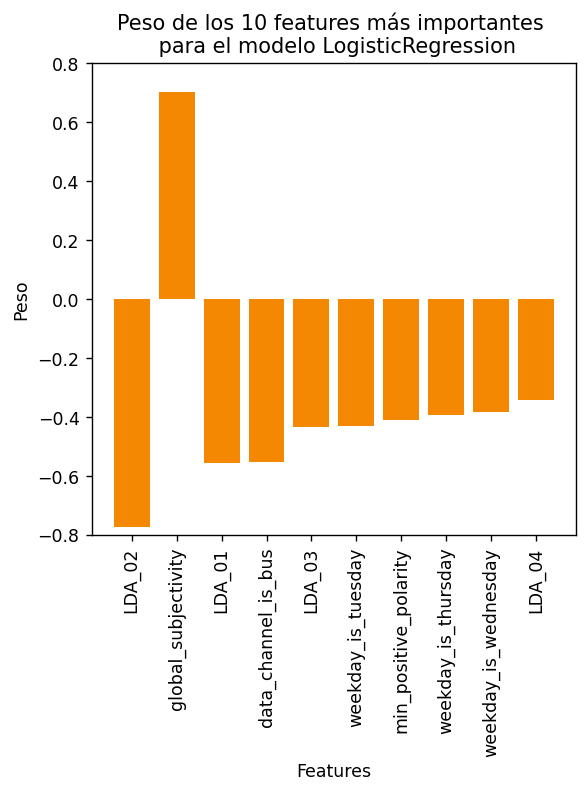

In [ ]:
plt.figure(dpi=125, figsize=(5,5))
plt.bar(features, coefs, color='#f58802')
plt.xlabel('Features')
plt.ylabel('Peso')
plt.title('Peso de los 10 features más importantes \n para el modelo LogisticRegression')
plt.xticks(rotation=90)
plt.ylim(-0.8,0.8)
plt.show()

Se muestan los 10 features más importantes para el modelo con sus respectivos pesos. Un peso negativo indica que a medida que crece el feature la predicción tiende a ser 0, mientras que para uno positivo tiende a ser 1.